In [1]:
import matplotlib.pyplot as plt

from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
model = keras.Sequential(
    [
        keras.Input(
            shape=(32, 32, 3),
            name='input'),
        keras.layers.Conv2D(
            32,
            (3, 3),
            activation='relu',
            name='conv_1'),
        keras.layers.MaxPool2D(
            pool_size=(2, 2),
            name='pooling_1'),
        keras.layers.Conv2D(
            32,
            (3, 3),
            activation='relu',
            name='conv_2'),
        keras.layers.Dropout(
            0.5,
            name='dropout'),
        keras.layers.Flatten(name='flatten'),
        keras.layers.Dense(
            10,
            activation='softmax',
            name='classification')
    ]
)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['acc'])

history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=25,
    validation_split=0.3)

Epoch 1/25
274/274 [==============================] - 9s 13ms/step - loss: 3.2097 - acc: 0.1050 - val_loss: 2.2956 - val_acc: 0.1155
Epoch 2/25
274/274 [==============================] - 3s 9ms/step - loss: 2.1934 - acc: 0.1847 - val_loss: 2.0876 - val_acc: 0.2366
Epoch 3/25
274/274 [==============================] - 3s 9ms/step - loss: 2.0210 - acc: 0.2585 - val_loss: 1.9515 - val_acc: 0.2869
Epoch 4/25
274/274 [==============================] - 3s 9ms/step - loss: 1.8664 - acc: 0.3126 - val_loss: 1.7075 - val_acc: 0.3701
Epoch 5/25
274/274 [==============================] - 2s 9ms/step - loss: 1.6964 - acc: 0.3793 - val_loss: 1.5202 - val_acc: 0.4507
Epoch 6/25
274/274 [==============================] - 2s 9ms/step - loss: 1.5473 - acc: 0.4375 - val_loss: 1.4442 - val_acc: 0.4815
Epoch 7/25
274/274 [==============================] - 3s 10ms/step - loss: 1.4603 - acc: 0.4729 - val_loss: 1.4053 - val_acc: 0.5000
Epoch 8/25
274/274 [==============================] - 3s 9ms/step - loss: 

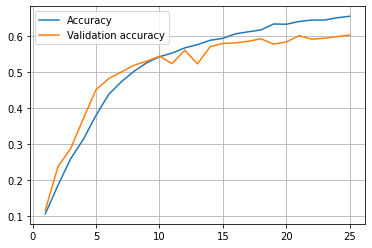

In [4]:
plt.plot(
    range(1, 26),
    history.history['acc'],
    label='Accuracy')
plt.plot(
    range(1, 26),
    history.history['val_acc'],
    label='Validation accuracy')
plt.legend()
plt.grid()
plt.show()

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 15, 15, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 13, 13, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 classification (Dense)      (None, 10)                54090     
                                                                 
Total params: 64,234
Trainable params: 64,234
Non-traina

: 